In [35]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import CategoricalColorMapper, ColumnDataSource
from bokeh.palettes import Category10
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import umap

Given example by paper to know how to use implementation

In [36]:
from sklearn.datasets import load_iris

iris = load_iris()
embedding = umap.UMAP(
    n_neighbors=50, learning_rate=0.5, init="random", min_dist=0.001
).fit_transform(iris.data)

output_file("iris.html")

targets = [str(d) for d in iris.target_names]

source = ColumnDataSource(
    dict(
        x=[e[0] for e in embedding],
        y=[e[1] for e in embedding],
        label=[targets[d] for d in iris.target],
    )
)

cmap = CategoricalColorMapper(factors=targets, palette=Category10[10])

p = figure(title="Test UMAP on Iris dataset")
p.circle(
    x="x",
    y="y",
    source=source,
    color={"field": "label", "transform": cmap},
    legend_label="label",
)

show(p)

1st try to use this for the 3-sphere

One of the key aspects for the visualization is the sampling on the 3-sphere. 
On one hand one could sample randomly, which would give the underlying structure 
more real than deterministicly choosing how to sample, but is later more difficult 
to interpret.

**Randomly sampling**

Gaussian sampling of $\mathbb{R}^n$ and normalizing so that each resulting point is in the 
3-sphere.

In [37]:
def gaussian_sample(n):
    #Generate n of 4D Gaussian samples (mean 0, std 1)
    points = np.random.normal(0, 1, (n, 4))
    
    # Compute the norm of each point along axis 1 (each row)
    norms = np.linalg.norm(points, axis=1)
    
    #Project onto 3-sphere
    points_on_3sphere = points / norms[:, np.newaxis]
    
    return points_on_3sphere

**Deterministic sampling**

Fibonacci grid method leverages the golden ratio to place points with minimal overlap by 
"spreading them out" in angular coordinates. For the 3-sphere, we need to generalize 
spherical coordinates in a way that minimizes clustering:

In [ ]:
def fibonaccigrid_sampling(n):
    phi = (1 + np.sqrt(5)) / 2  
    
    # Initialize arrays for Cartesian coordinates
    points = np.zeros((n, 4))
    
    for k in range(n):
        #Compute angles using the index k and n points
        theta = np.arccos(1 - 2 * (k + 0.5) / n)  # Range [0, π]
        phi_k = 2 * np.pi * (k / phi**2)          # Range [0, 2π], scaled by golden ratio squared
        psi_k = 2 * np.pi * (k / phi**3)          # Additional rotation for 3rd angle, golden ratio cubed
        
        #Convert spherical coordinates to Cartesian coordinates in 4D
        points[k, 0] = np.cos(theta)
        points[k, 1] = np.sin(theta) * np.cos(phi_k)
        points[k, 2] = np.sin(theta) * np.sin(phi_k) * np.cos(psi_k)
        points[k, 3] = np.sin(theta) * np.sin(phi_k) * np.sin(psi_k)
    
    return points

Using the golden ratio as the basis for angle increments helps avoid overlaps and clustering, creating a quasi-uniform distribution that approximates equal spacing. While true uniformity is not achievable on higher-dimensional spheres without complex optimization, this approach provides a good approximation that’s simple to implement. Other approaches with the optimization: explore energy minimization method!

**Dimensionality reduction with UMAP**

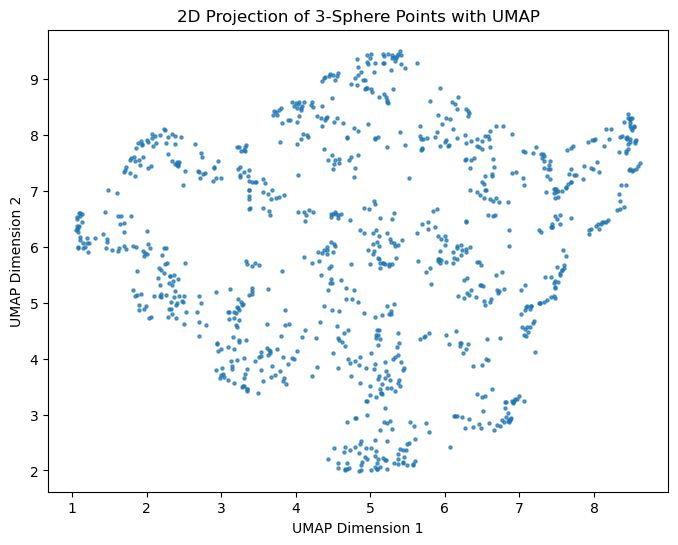

In [39]:
#Gaussian sampled dataset
n_points = 1000
randomly_sampled_points = gaussian_sample(n_points)

#Check that each point is on the 3-sphere
#print(np.round(np.linalg.norm(randomly_sampled_points, axis=1), 5))  

embedding_2d = umap.UMAP(
    n_components = 2, n_neighbors=50, learning_rate=0.5, init="random", min_dist=0.001
).fit_transform(randomly_sampled_points.data)

# Plotting the 2D UMAP result
plt.figure(figsize=(8, 6))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=5, alpha=0.7)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('2D Projection of 3-Sphere Points with UMAP')
plt.show()

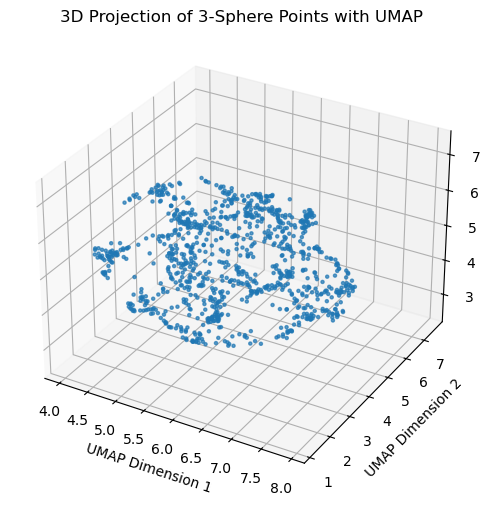

In [41]:
embedding_3d = umap.UMAP(
    n_components = 3, n_neighbors=50, learning_rate=0.5, init="random", min_dist=0.001
).fit_transform(randomly_sampled_points.data)

#Plotting the 3D UMAP result
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], s=5, alpha=0.7)
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.set_zlabel('UMAP Dimension 3')
ax.set_title('3D Projection of 3-Sphere Points with UMAP')
plt.show()


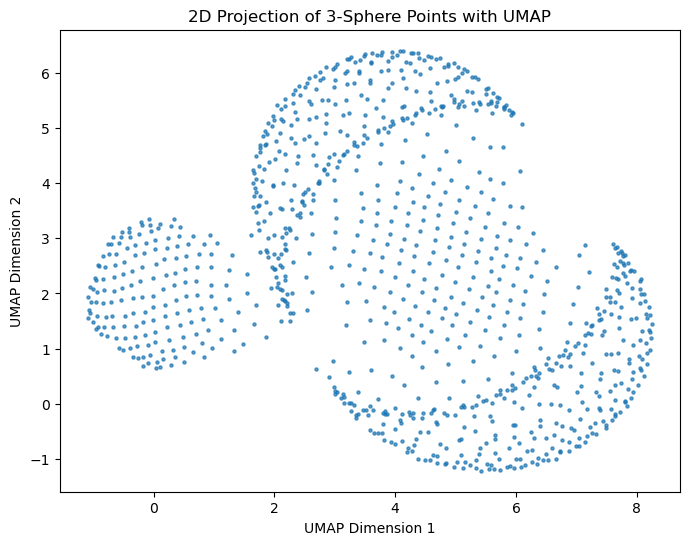

In [42]:
n_points = 1000
fibonaccigrid_sampled_points = fibonaccigrid_sampling(n_points)

# Check that each point lies on the 3-sphere 
#print(np.round(np.linalg.norm(fibonaccigrid_sampled_points, axis=1), 5)) 

fg_embedding_2d = umap.UMAP(
    n_components = 2, n_neighbors=50, learning_rate=0.5, init="random", min_dist=0.001
).fit_transform(fibonaccigrid_sampled_points.data)

# Plotting the 2D UMAP result
plt.figure(figsize=(8, 6))
plt.scatter(fg_embedding_2d[:, 0], fg_embedding_2d[:, 1], s=5, alpha=0.7)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('2D Projection of 3-Sphere Points with UMAP')
plt.show()

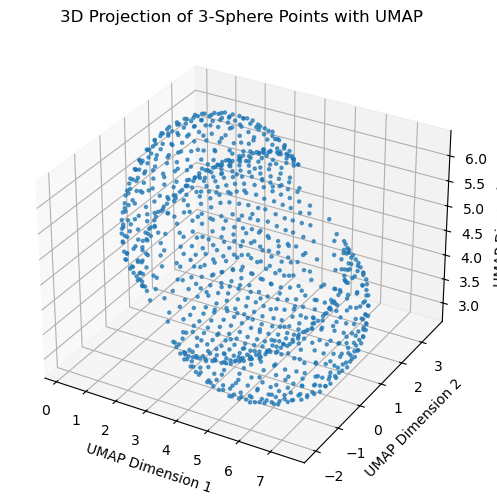

In [43]:
fg_embedding_3d = umap.UMAP(
    n_components = 3, n_neighbors=50, learning_rate=0.5, init="random", min_dist=0.001
).fit_transform(fibonaccigrid_sampled_points.data)

#Plotting the 3D UMAP result
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(fg_embedding_3d[:, 0], fg_embedding_3d[:, 1], fg_embedding_3d[:, 2], s=5, alpha=0.7)
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.set_zlabel('UMAP Dimension 3')
ax.set_title('3D Projection of 3-Sphere Points with UMAP')
plt.show()